## Observations and Insights 

In [102]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_combined=mouse_metadata.merge(study_results, left_on='Mouse ID', right_on='Mouse ID')
data_clean=data_combined['Mouse ID'].nunique()

# Display the data table for preview
print(data_combined)


     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [103]:
# Checking the number of mice.
mice= data_combined['Mouse ID'].count()
print(mice)

1893


In [104]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate = data_combined[data_combined.duplicated(subset=['Mouse ID', 'Timepoint'])]

print(duplicate)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [105]:
# Optional: Get all the data for the duplicate mouse ID. 



In [106]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=data_combined.drop_duplicates(subset=['Mouse ID'])
print(clean_data)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane    Male          21          16          0   
10       s185    Capomulin  Female           3          17          0   
20       x401    Capomulin  Female          16          15          0   
30       m601    Capomulin    Male          22          17          0   
40       g791     Ramicane    Male          11          16          0   
...       ...          ...     ...         ...         ...        ...   
1858     z314     Stelasyn  Female          21          28          0   
1860     z435     Propriva  Female          12          26          0   
1863     z581    Infubinol  Female          24          25          0   
1873     z795     Naftisol  Female          13          29          0   
1883     z969     Naftisol    Male           9          30          0   

      Tumor Volume (mm3)  Metastatic Sites  
0                   45.0                 0  
10                  45.0         

In [107]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count=clean_data['Mouse ID'].count()
print(clean_mouse_count)

249


## Summary Statistics

In [258]:
avg = data_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = data_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var = data_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv= data_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = data_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary = pd.DataFrame ({'Avg': avg, 'Median': median, 'Variance': var, "Standard Deviation": stdv, 'SEM': sem})

summary 
 





,Avg,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

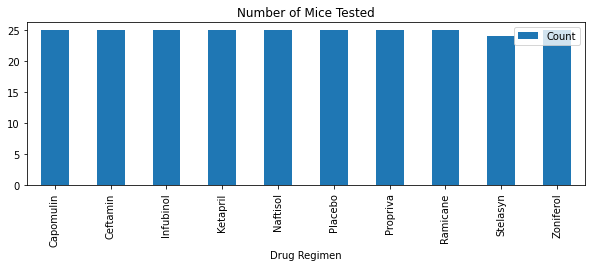

<Figure size 432x288 with 0 Axes>

In [109]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
unique_mice = pd.DataFrame(clean_data.groupby(["Drug Regimen"]).nunique()).reset_index()
dr_points = unique_mice[["Drug Regimen","Mouse ID"]]
dr_points = dr_points.rename(columns={"Mouse ID": "Count"})
dr_points = dr_points.set_index("Drug Regimen")
dr_points.plot(kind="bar", figsize=(10,3))
plt.title("Number of Mice Tested")

plt.show()
plt.tight_layout()

<BarContainer object of 10 artists>

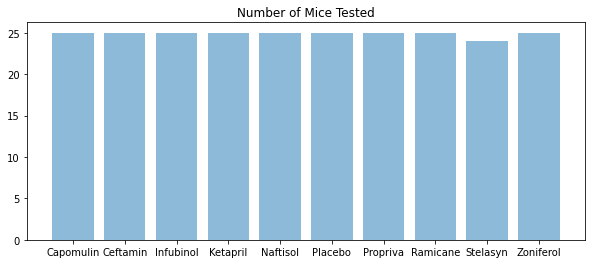

In [265]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

dr= summary.index.tolist()
dr_count=(data_combined.groupby(['Drug Regimen'])['Mouse ID']).nunique().tolist()
x_axis=np.arange(len(dr_count))
x_axis = dr
plt.figure(figsize=(10,4))
plt.title('Number of Mice Tested')
plt.bar(x_axis, dr_count, alpha=0.5, align='center')

<AxesSubplot:ylabel='Gender'>

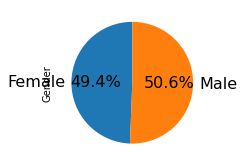

In [268]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender=pd.DataFrame(data_combined.groupby(['Sex']).count()).reset_index()
gender=gender.rename(columns={'Mouse ID': 'Gender'})
ax1 = plt.subplot(121, aspect='equal')
gender.plot(kind='pie', y ='Gender', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=gender['Sex'], legend = False, fontsize=16)


([<matplotlib.patches.Wedge at 0x20145e1cb20>,
 [Text(0.02099250347258556, 1.0997996703027118, 'Female'),
  Text(-0.020992503472586185, -1.0997996703027118, 'Male')],
 [Text(0.011450456439592123, 0.5998907292560246, '49.4%'),
  Text(-0.011450456439592464, -0.5998907292560246, '50.6%')])

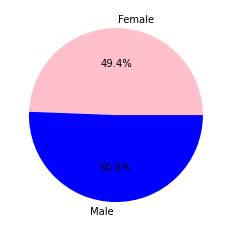

In [112]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

g_count=(data_combined.groupby(['Sex'])['Age_months'].count()).tolist()
colors=['pink', 'blue']
labels=['Female', 'Male']
plt.pie(g_count, labels=labels, colors=colors, autopct='%1.1f%%')

## Quartiles, Outliers and Boxplots

In [204]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
sorted=data_combined.drop_duplicates(['Timepoint','Drug Regimen', 'Mouse ID'])
specific_drugs = sorted[sorted['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
specific_drugs=sorted.loc[sorted['Timepoint']]
specific_drugs



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
5,k403,Ramicane,Male,21,16,25,33.464577,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
20,x401,Capomulin,Female,16,15,0,45.000000,0
...,...,...,...,...,...,...,...,...
25,x401,Capomulin,Female,16,15,25,36.617120,0
30,m601,Capomulin,Male,22,17,0,45.000000,0
35,m601,Capomulin,Male,22,17,25,33.118756,1
40,g791,Ramicane,Male,11,16,0,45.000000,0


In [247]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list=summary.index.tolist()
treatment_list
# Create empty list to fill with tumor vol data (for plotting)
tv_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.  
    # Locate the rows which contain mice on each drug and get the tumor volumes
sorted_tv=data_combined.sort_values(['Tumor Volume (mm3)', 'Drug Regimen', 'Mouse ID'])
    
    # add subset 
select_drugs= sorted_tv[sorted_tv['Drug Regimen'].filter(items=['Capomulin', 'Ramicane', 'Infuinol', 'Ceftamin'])].reset_index()


    # Determine outliers using upper and lower bounds

quartiles= select_drugs.quantile([.25,.5,.75])
lower=quartiles[.25]
upper=quartiles[.75]
iqr=upper-lower

    

KeyError: 0.25

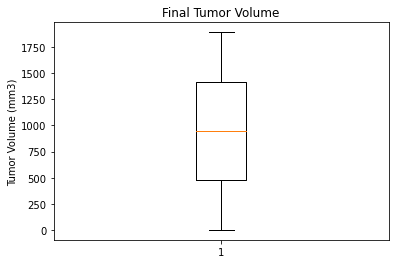

In [254]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
figure, axis = plt.subplots()
axis.set_title('Final Tumor Volume')
axis.set_ylabel('Tumor Volume (mm3)')
axis.boxplot(select_drugs)
plt.show()


## Line and Scatter Plots

<AxesSubplot:title={'center':'Timepoint Vs Avg Tumor Size'}, xlabel='Timepoint'>

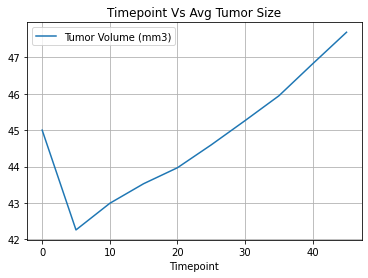

In [163]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


cap=data_combined.loc[data_combined['Drug Regimen']=='Capomulin']
cap=cap.reset_index()
cap_mouse=cap.loc[cap['Mouse ID']=='i557']

time =cap_mouse.loc[:, ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
avg_tumor=pd.DataFrame(time.groupby(['Mouse ID', 'Timepoint'])['Tumor Volume (mm3)'].mean()).reset_index()
avg_tumor=avg_tumor.set_index('Mouse ID')
avg_tumor.plot(kind='line', x='Timepoint', y='Tumor Volume (mm3)', grid=True, title= 'Timepoint Vs Avg Tumor Size')




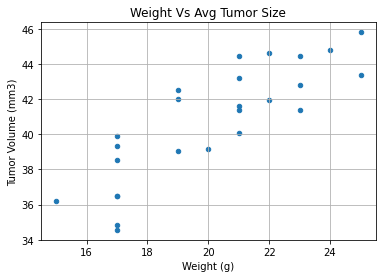

In [158]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight =cap.loc[:, ['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]
avg_tumor=pd.DataFrame(weight.groupby(['Mouse ID', 'Weight (g)'])['Tumor Volume (mm3)'].mean()).reset_index()
avg_tumor=avg_tumor.set_index('Mouse ID')
avg_tumor.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid=True, title= 'Weight Vs Avg Tumor Size')

plt.show()

## Correlation and Regression

In [165]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

mouse_w=avg_tumor.iloc[:,0]
avg_tv=avg_tumor.iloc[:,1]
correlation=st.pearsonr(mouse_w, avg_tv)
print(f'The correlation between the weight and avg tumor volume is {round(correlation[0],2)}')

The correlation between the weight and avg tumor volume is 0.83
